# Deep learning

## We'll explore how to use neural network via 4 examples.

- ***1. Applying a neural network for digital handwriting classification***
    - image data, multiclass classification
- ***2. Classifying movie reviews: a binary classification example***
    - text data, binary classification
- ***3. Classifying newswires: a multi-class classification example***
    - text data, multiclass classification
- ***4. Predicting house prices***
    -  a regression example

<font color="orangered">
    
## Example 1    
### Applying a neural network for digital handwriting classification

MNIST dataset; 60,000 training images, plus 10,000 test images; labels are with 10 categories (0 to 9)
</font>

In [11]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the input data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(train_images.shape[1],)))  # Specify the input shape
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# one-hot encoding for categorical data
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
 
# train the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# get the accuracy on test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9237 - loss: 0.2651
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9670 - loss: 0.1099
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9783 - loss: 0.0720
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9847 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9882 - loss: 0.0391
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0652
test_acc: 0.980400025844574


<font color="Orangered">
    The complete code is shown above. Let us break it down to examine the details more closely.
</font>

In [4]:
# load the data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#the shape of the data
print(f"The shape of training set: {train_images.shape}")

The shape of training set: (60000, 28, 28)


<font color="Orangered">In the training set, there are 60000 instances/images. Let's take a look at one of the images.</font>


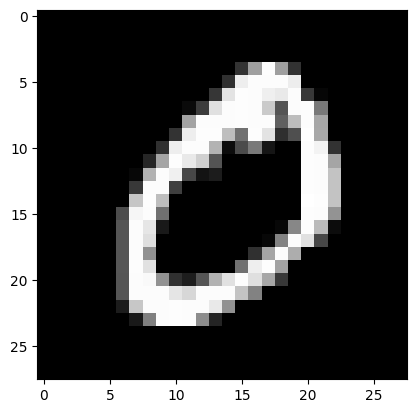

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1], cmap='gray', interpolation='nearest')
plt.show()

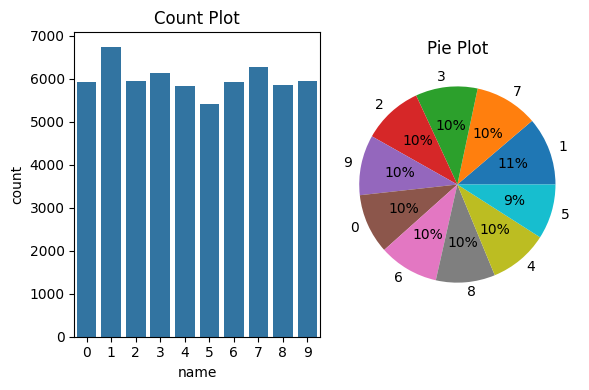

In [7]:
import seaborn as sns
import pandas as pd 
def plotcount(df):
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    sns.countplot(x='name',data=df)
    plt.title('Count Plot')
    plt.subplot(1,2,2)
    counts=df['name'].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%0.0f%%')
    plt.title('Pie Plot')
    plt.tight_layout()
    plt.show()  
df=pd.DataFrame(train_labels,columns=['name'])
plotcount(df)

<font color="orangered">
These plots illustrate the count and distribution of the labels. There are 10 output categories (0–9), and the number of samples in each category is comparable.
</font>

<font color="orangered">
There are two ways to define a model: using the Sequential class (only for linear stacks of layers, which is the most common network architecture by far), and the
"functional API" (for directed acyclic graphs of layers, allowing to build completely arbitrary architectures).

Let's take a look at a network definition using the functional API.
</font>

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the input data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras import models
from keras import layers
input_tensor=layers.Input(shape=(train_images.shape[1],))
x=layers.Dense(512, activation='relu')(input_tensor)
output_tensor=layers.Dense(10, activation='softmax')(x)
network=model = models.Model(inputs=input_tensor, outputs=output_tensor)
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# one-hot encoding for categorical data
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# train the model
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# get the accuracy on test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9241 - loss: 0.2642
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9684 - loss: 0.1076
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0705
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9846 - loss: 0.0517
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0384
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0718
test_acc: 0.9764999747276306


<font color="orangered">
    
1. Tensor
    
Almost all ML systems use tensors as their basic structure. So what is a tensor? At its core, a tensor is a container for data—almost always numerical data. So, a container for numbers. You may be already familiar with matrices, which are 2D tensors: tensors are merely a generalization of matrices to an arbitrary number of dimensions (note that in the context of tensors, "dimension" is often called "axis").

2. Training neural networks using gradient descent.

How neural networks "learn"? "Learning" simply means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets. 

This is done by drawing random batches of data samples and their targets, and computing the gradient of the network parameters with respect to the loss on the batch. The network parameters are then moved "a bit" (the magnitude of the move is defined by the learning rate) in the direction opposite to the gradient. The whole process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it is
possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.

These are the two things you need to define before you start feeding data into a network. The "loss" is the quantity that you will attempt to minimize
during training, so it should represent a measure of success on the task you are trying to solve. The "optimizer" specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the "RMSprop" optimizer, "SGD with momentum", and so on
</font>

<font color="green">
    
## Example 2    
### Classifying movie reviews: a binary classification example

We’ll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.
</font>

In [16]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# In order to monitor during training the accuracy of the model on data that it has never seen before, 
# we will create a "validation set" by setting apart 10,000 samples from the original training data:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Build the model
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(x_train .shape[1],)))  # Specify the input shape
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# get the accuracy on test data
test_loss, test_acc = network.evaluate(x_test, test_labels)
print('test_acc:', test_acc)

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7530 - loss: 0.5489 - val_accuracy: 0.8549 - val_loss: 0.4324
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8887 - loss: 0.3450 - val_accuracy: 0.8832 - val_loss: 0.3231
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9155 - loss: 0.2540 - val_accuracy: 0.8887 - val_loss: 0.2881
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9355 - loss: 0.2063 - val_accuracy: 0.8866 - val_loss: 0.2839
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8802 - loss: 0.2956
test_acc: 0.8802000284194946


<font color="green">
Let us examine the code in detail.
</font>

In [22]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
"""The argument num_words=10000 means that we will only keep the top 10,000 most
frequently occurring words in the training data. Rare words will be discarded. This
allows us to work with vector data of manageable size."""

# Decode one of these reviews back to English words
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [20]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(f"The shape of the training data: {train_data.shape}")
print(f"The length of the 1st sample: {len(train_data[0])}")
print(f"The length of the 2nd sample: {len(train_data[1])}")
print(f"The unique value of y: {np.unique(train_labels)}")

The shape of the training data: (25000,)
The length of the 1st sample: 218
The length of the 2nd sample: 189
The unique value of y: [0 1]


<font color="green">
The length for each sample can be different. We need to turn our lists into tensors. There are two ways we could do that:
    
(1). We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape, then use as the first layer in our network a (samples, word_indices) layer capable of handling such integer tensors.

(2). We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence into a 10,000-dimensional vector [3, 5] that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a layer, capable of handling floating point vector Dense data. That's why we have "def vectorize_sequences()" function in our data.
</font>

In [23]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training and test data 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(x_train .shape[1],)))  # Specify the input shape
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),verbose=0)

In [24]:
# The predicted value.
network.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.01939662],
       [1.        ],
       [0.9455319 ],
       ...,
       [0.00585633],
       [0.00632788],
       [0.9436552 ]], shape=(25000, 1), dtype=float32)

In [25]:
# Note that the call to returns a object. This object has a model.fit() History member , 
# which is a dictionary containing data about everything that happened history during training
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

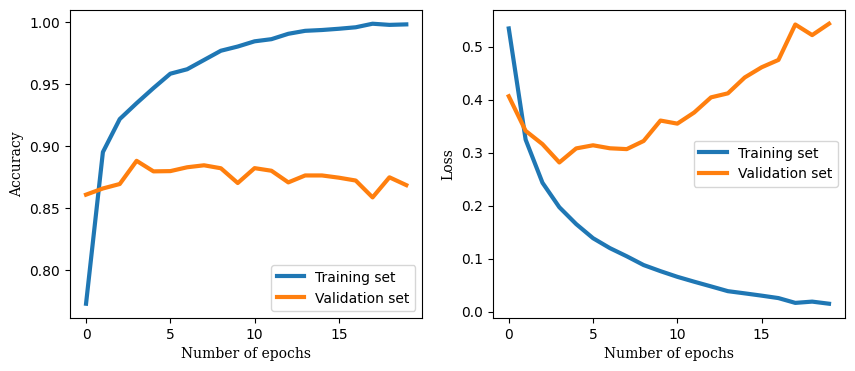

In [28]:
# Let’s use Matplotlib to plot the training and validation loss side by
# side, as well as the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(20),history.history['accuracy'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_accuracy'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(20),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

<font color="green">
    
- As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient descent optimization—the quantity you are trying to minimize should get lower with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you are seeing is
"overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

- In this case, to prevent overfitting, we could simply stop training after three epochs. That's why the code at the very beginning sets epoch=4.
</font>

<font color="orangered">
    
## Example 3 
### Classifying newswires: a multi-class classification example

We will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of "multi-class classification", and since each data point should be classified into only one category, the problem is more specifically an instance of "single-label, multi-class classification". If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.
</font>

In [29]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

n=one_hot_test_labels.shape[1]
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(x_train .shape[1],)))  # Specify the input shape
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(n, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),verbose=0)

# get the accuracy on test data
test_loss, test_acc = network.evaluate(x_test, one_hot_test_labels)
print('test_acc:', test_acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.9999
test_acc: 0.7951914668083191


In [36]:
# Accuracy of a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.19857524487978628

<font color="orangered">

Our approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%, but in our
case it is closer to 19%, so our results seem pretty good, at least when compared to a
random baseline
    
</font>

<font color="orangered">
    
***Let's examine the code in detail.***

- ***(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)***: the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

- ***model.add(layers.Dense(64, activation='relu'))***: In a stack of layers like what we were using, each layer can only access Dense information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information. For this reason we will use larger layers, like 64.

</font>

In [31]:
print(f"One of the sample: {train_data[4]}")
print(f"The shape of the training data: {train_data.shape}")
print(f"The length of the 1st sample: {len(train_data[0])}")
print(f"The length of the 2nd sample: {len(train_data[1])}")
print(f"The unique value of y: {np.unique(train_labels)}")

One of the sample: [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 22, 265, 9, 621, 575, 1080, 4742, 1149, 2, 6, 438, 8295, 13, 102, 388, 15, 90, 67, 7, 197, 8295, 8, 4, 270, 416, 23, 527, 6, 2, 4891, 4, 1055, 742, 16, 8, 36, 1480, 6, 2124, 100, 543, 5, 645, 362, 6, 2912, 4, 49, 8, 2, 976, 124, 20, 5, 8295, 80, 9, 100, 362, 543, 395, 61, 44, 20, 8295, 8, 16, 40, 1276, 42, 1436, 166, 415, 6, 888, 4, 116, 9, 40, 3089, 4, 303, 163, 16, 64, 772, 13, 94, 156, 17, 12]
The shape of the training data: (8982,)
The length of the 1st sample: 87
The length of the 2nd sample: 56
The unique value of y: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


<font color="orangered">
    
- Each example is a list of integers (word indices).
- The length for each sample can be different. We need to turn our lists into tensors by e.g. one-hot encoding.
- The label associated with an example is an integer between 0 and 45: a topic index.

</font>

In [32]:
# We can also decode it back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
print(f"The predicted probability of one sample for each of 46 classes:\n {network.predict(x_test)[0]}")
print(f"The predicted classes:\n {np.argmax(network.predict(x_test)[0])}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The predicted probability of one sample for each of 46 classes:
 [4.8048169e-06 2.0878162e-05 2.2262211e-07 9.8706472e-01 1.2010737e-02
 9.4898319e-08 4.3948320e-10 3.1222808e-06 5.3191954e-05 4.6751236e-07
 1.8767080e-06 1.6516104e-04 3.1120039e-06 8.8970783e-06 3.5055422e-07
 3.8674983e-07 1.5117860e-04 1.4038507e-06 9.7191020e-08 9.3543109e-05
 3.0643915e-04 2.3514254e-05 1.6685500e-06 6.3012885e-06 1.4893311e-07
 1.2314539e-06 5.5798381e-08 9.6557360e-06 1.0684220e-06 2.5587351e-06
 2.2462111e-06 2.0821419e-06 2.3307414e-06 6.9421588e-07 6.2535159e-06
 1.0334432e-07 1.7180490e-05 1.5024126e-07 5.6160765e-08 1.5886206e-05
 1.7602379e-07 1.3789386e-05 5.4866188e-08 2.0853454e-06 6.9609793e-09
 2.0421520e-08]
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The predicted classes:
 3


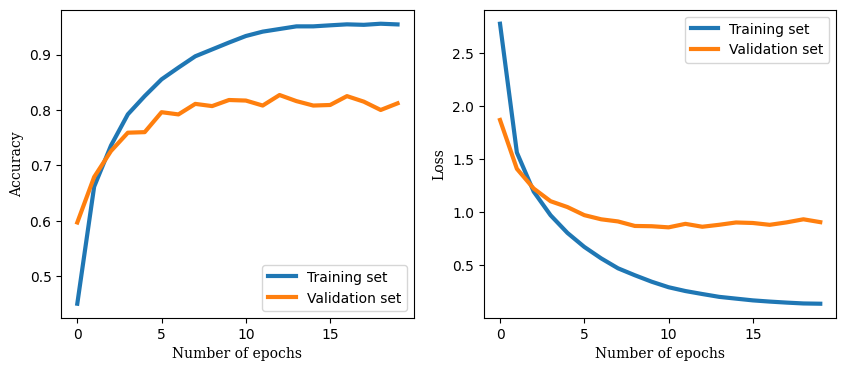

In [35]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(20),history.history['accuracy'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_accuracy'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(20),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

<font color="orangered">
    
- It seems that the network starts overfitting after 9 epochs; therefore, we can set the number of training epochs to 9 for the final model.
</font>

<font color="green">
    
## Example 4
### Predicting house prices: a regression example

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The data has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100.
</font>

In [50]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

import numpy as np
test_data = (test_data - np.mean(train_data, axis=0))/np.std(train_data, axis=0)
train_data = (train_data - np.mean(train_data, axis=0))/np.std(train_data, axis=0)

from keras import models
from keras import layers
def build_model():
    network = models.Sequential()
    network.add(layers.Input(shape=(train_data.shape[1],)))  # Specify the input shape
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return network

network=build_model()
network.fit(train_data, train_labels, epochs=80, batch_size=10, verbose=0)
test_loss, test_mae = network.evaluate(test_data, test_labels)
print(f"The mean absolute error: {test_mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 17.2121 - mae: 2.6932
The mean absolute error: 2.6931633949279785


<font color="green">
    
- Let's examine the code in detail. For example, why epoch=80?
</font>

In [53]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print(f"The shape of training data: {train_data.shape}")
print(f"The shape of test data: {test_data.shape}")
print(f"The first sample: \n {train_data[0]}")

The shape of training data: (404, 13)
The shape of test data: (102, 13)
The first sample: 
 [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


<font color="green">
    
- As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features.
- The features have difference range. So we need to standardize each feature.
</font>

In [54]:
import numpy as np
train_data = (train_data - np.mean(train_data, axis=0))/np.std(train_data, axis=0)
test_data = (test_data - np.mean(train_data, axis=0))/np.std(train_data, axis=0)

In [55]:
# Build the model
from keras import models
from keras import layers
def build_model():
    network = models.Sequential()
    network.add(layers.Input(shape=(train_data.shape[1],)))  # Specify the input shape
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return network

<font color="green">
    
- To evaluate our network while we keep adjusting its parameters (such as the number of
epochs used for training), we could simply split the data into a training set and a
validation set, as we were doing in our previous examples. However, because we have so
few data points, the validation set would end up being very small (e.g. about 100
examples). A consequence is that our validation scores may change a lot depending on
which data points we choose to use for validation and which we choose for training, i.e.
the validation scores may have a high with regard to the validation split. This variance
would prevent us from reliably evaluating our model.

- The best practice in such situations is to use K-fold cross-validation. It consists of
splitting the available data into K partitions (typically K=4 or 5), then instantiating K
identical models, and training each one on K-1 partitions while evaluating on the
remaining partition. The validation score for the model used would then be the average of
the K validation scores obtained.

</font>

In [56]:
# Use kfold cross validation to find the optimal hyperparameter epoch
from sklearn.model_selection import KFold
number_kfold=5
number_epochs=200
kf = KFold(n_splits=number_kfold)
mae=np.zeros((number_epochs,number_kfold))
loss=np.zeros((number_epochs,number_kfold))
for i, (train_index, test_index) in enumerate(kf.split(train_data)):
    network=build_model()
    history = network.fit(train_data[train_index],
                            train_labels[train_index],
                            epochs=number_epochs,
                            batch_size=10,verbose=0,
                            validation_data=(train_data[test_index],train_labels[test_index]))
    test_loss, test_mae = network.evaluate(train_data[test_index], train_labels[test_index])
    mae[:,i]=history.history['val_mae']
    loss[:,i]=history.history['val_loss']

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.7048 - mae: 2.3849
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.1242 - mae: 2.9928
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.0337 - mae: 2.2229
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.4389 - mae: 2.5716
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16.8695 - mae: 2.5127 


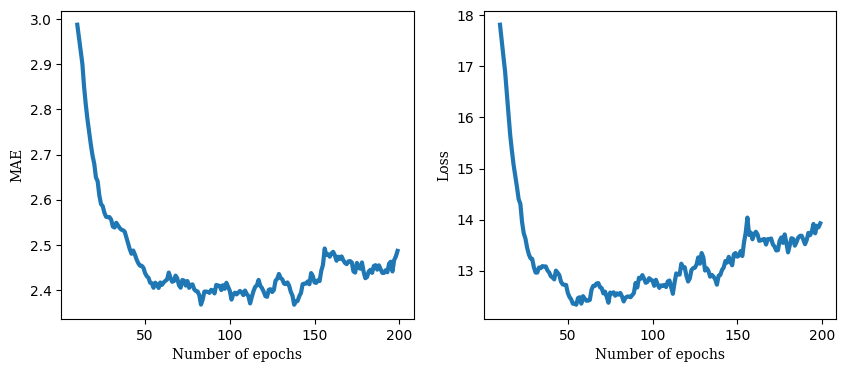

In [57]:
def smooth_curve(points,factor=0.1):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            smoothed_points.append(factor*point+(1-factor)*smoothed_points[-1])
        else:
            smoothed_points.append(point)
    return smoothed_points

import matplotlib.pyplot as plt
def plot_loss(mae,loss):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(10,len(mae)+10),mae,linewidth=3)
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("MAE",fontdict= {'family':'serif','size':10})
    plt.subplot(1,2,2)
    plt.plot(range(10,len(mae)+10),loss,linewidth=3)
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.show()
o1=mae.mean(axis=1)
o2=loss.mean(axis=1)
o1=smooth_curve(o1[10:],factor=0.2)
o2=smooth_curve(o2[10:],factor=0.2)
plot_loss(o1,o2)

<font color="green">
    
- What we have used here:
    -  (1). Omit the first 10 data points, which are on a different scale from the rest of the curve;
    -  (2). Replace each point with an exponential moving average of the previous point, to obtain a smooth curve.
- According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. That's why our final "production" model set epoch=80 at the very beginning. Besides, the final "production" model is trained on all of the training data.

</font>